Running K-Means with k=64...
K-Means done in 0.384s.
Predicting labels for the full image...
Prediction done in 0.039s.
Running K-Means with k=32...
K-Means done in 0.051s.
Predicting labels for the full image...
Prediction done in 0.045s.
Running K-Means with k=16...
K-Means done in 0.075s.
Predicting labels for the full image...
Prediction done in 0.039s.
Running K-Means with k=4...
K-Means done in 0.047s.
Predicting labels for the full image...
Prediction done in 0.053s.
Running Random Quantization with k=64...
Random Quantization done in 0.058s.
Running Random Quantization with k=32...
Random Quantization done in 0.051s.
Running Random Quantization with k=16...
Random Quantization done in 0.047s.
Running Random Quantization with k=4...
Random Quantization done in 0.052s.


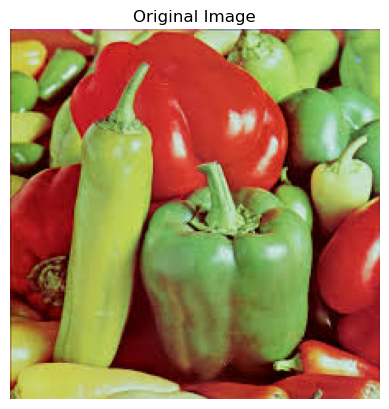

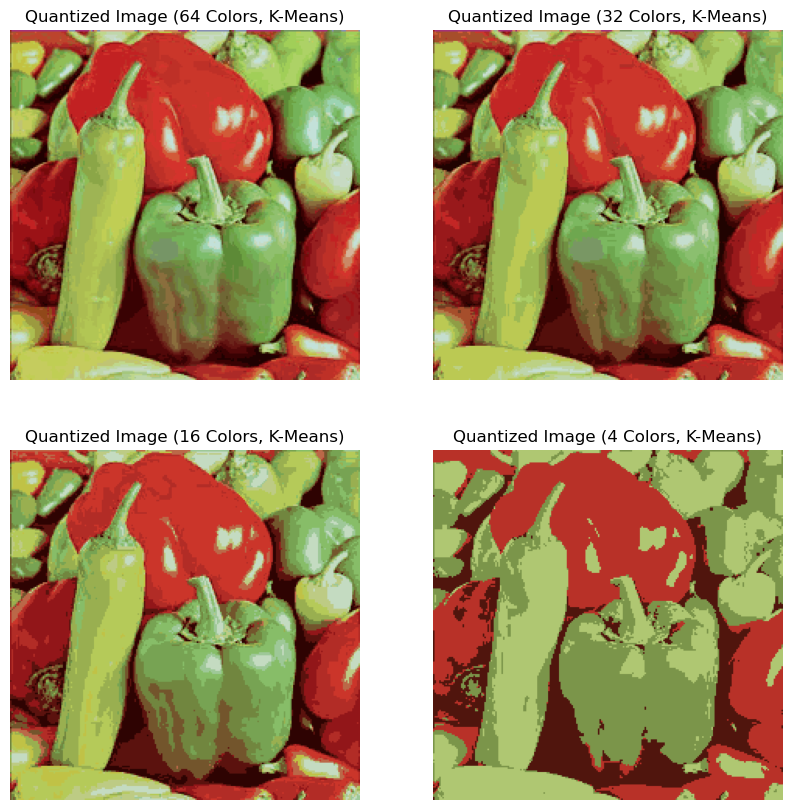

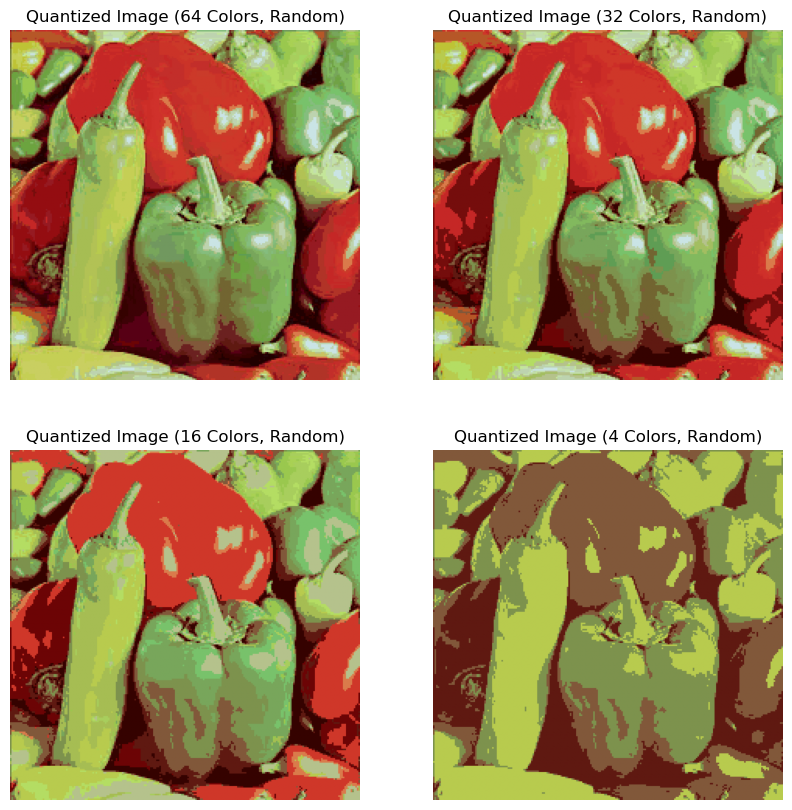

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from time import time

# Hàm để tái tạo hình ảnh từ các trung tâm cụm và nhãn
def recreate_image(codebook, labels, width, height):
    """
    Tái tạo hình ảnh từ bảng mã màu (codebook) và nhãn cụm.
    """
    depth = codebook.shape[1]  # Số kênh màu (RGB)
    image = np.zeros((width, height, depth))  # Tạo mảng 0 cho hình ảnh
    label_idx = 0
    for i in range(width):
        for j in range(height):
            image[i][j] = codebook[labels[label_idx]]  # Gán màu từ bảng mã
            label_idx += 1
    return image

# Đọc và chuẩn hóa hình ảnh
pepper = imread("D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\pepper.jpg")  # Đổi đường dẫn hình ảnh của bạn
pepper = np.array(pepper, dtype=np.float64) / 255  # Chuẩn hóa giá trị từ 0-255 về 0-1
w, h, d = pepper.shape  # Lấy kích thước gốc của hình ảnh
assert d == 3  # Đảm bảo ảnh có 3 kênh (RGB)
image_array = np.reshape(pepper, (w * h, d))  # Chuyển ảnh thành mảng 2D

# Hiển thị hình ảnh gốc
plt.figure(1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(pepper)

# Lượng tử hóa màu bằng K-Means
plt.figure(2, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Mẫu hóa ảnh cho quá trình K-Means
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    
    # Áp dụng thuật toán K-Means
    print(f"Running K-Means with k={k}...")
    t0 = time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print(f"K-Means done in {time() - t0:.3f}s.")

    # Dự đoán nhãn cụm cho tất cả pixel
    print("Predicting labels for the full image...")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"Prediction done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, K-Means)')
    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    plt.imshow(quantized_image)

# Lượng tử hóa màu bằng cách chọn ngẫu nhiên bảng mã
plt.figure(3, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Tạo bảng mã màu ngẫu nhiên
    codebook_random = shuffle(image_array, random_state=0)[:k]
    
    # Dự đoán nhãn cụm dựa trên bảng mã ngẫu nhiên
    print(f"Running Random Quantization with k={k}...")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"Random Quantization done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, Random)')
    random_image = recreate_image(codebook_random, labels_random, w, h)
    plt.imshow(random_image)

plt.show()


Running K-Means with k=64...
K-Means done in 0.064s.
Predicting labels for the full image...
Prediction done in 0.013s.
Running K-Means with k=32...
K-Means done in 0.019s.
Predicting labels for the full image...
Prediction done in 0.027s.
Running K-Means with k=16...
K-Means done in 0.019s.
Predicting labels for the full image...
Prediction done in 0.017s.
Running K-Means with k=4...
K-Means done in 0.021s.
Predicting labels for the full image...
Prediction done in 0.025s.
Running Random Quantization with k=64...
Random Quantization done in 0.038s.
Running Random Quantization with k=32...
Random Quantization done in 0.018s.
Running Random Quantization with k=16...
Random Quantization done in 0.030s.
Running Random Quantization with k=4...
Random Quantization done in 0.024s.


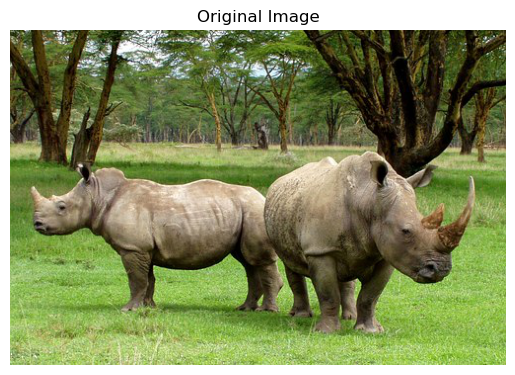

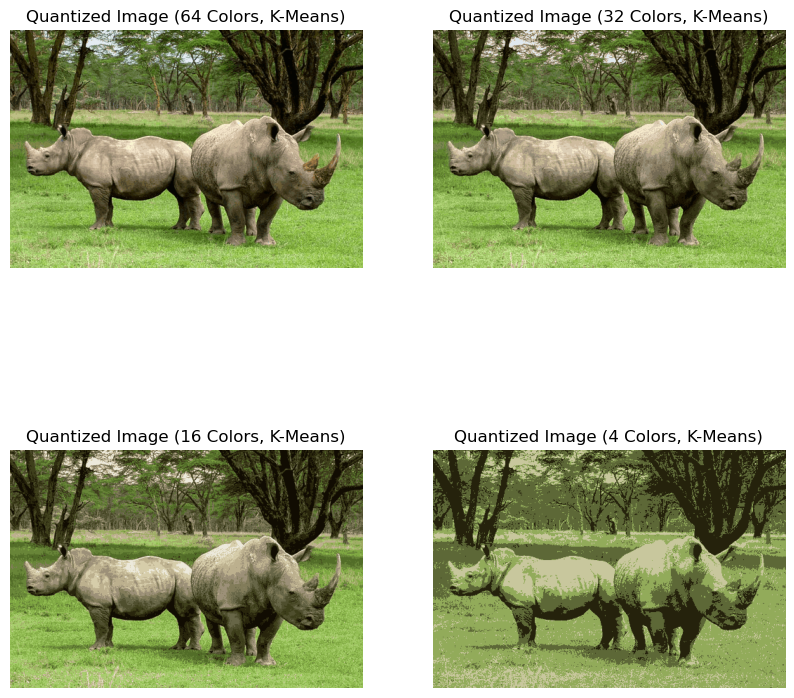

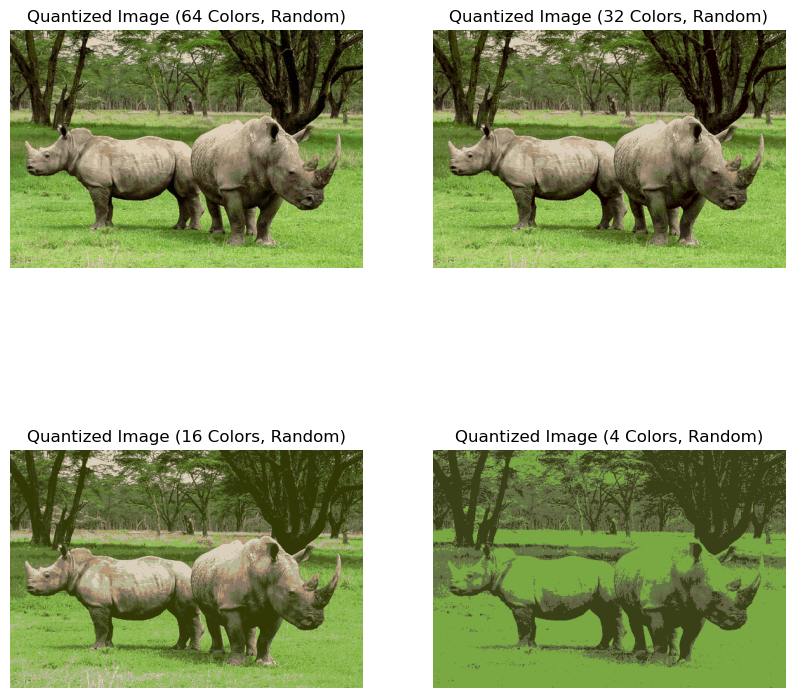

In [2]:
# Hàm để tái tạo hình ảnh từ các trung tâm cụm và nhãn
def recreate_image(codebook, labels, width, height):
    """
    Tái tạo hình ảnh từ bảng mã màu (codebook) và nhãn cụm.
    """
    depth = codebook.shape[1]  # Số kênh màu (RGB)
    image = np.zeros((width, height, depth))  # Tạo mảng 0 cho hình ảnh
    label_idx = 0
    for i in range(width):
        for j in range(height):
            image[i][j] = codebook[labels[label_idx]]  # Gán màu từ bảng mã
            label_idx += 1
    return image

# Đọc và chuẩn hóa hình ảnh
pepper = imread("D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\rhino.jpg")  # Đổi đường dẫn hình ảnh của bạn
pepper = np.array(pepper, dtype=np.float64) / 255  # Chuẩn hóa giá trị từ 0-255 về 0-1
w, h, d = pepper.shape  # Lấy kích thước gốc của hình ảnh
assert d == 3  # Đảm bảo ảnh có 3 kênh (RGB)
image_array = np.reshape(pepper, (w * h, d))  # Chuyển ảnh thành mảng 2D

# Hiển thị hình ảnh gốc
plt.figure(1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(pepper)

# Lượng tử hóa màu bằng K-Means
plt.figure(2, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Mẫu hóa ảnh cho quá trình K-Means
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    
    # Áp dụng thuật toán K-Means
    print(f"Running K-Means with k={k}...")
    t0 = time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print(f"K-Means done in {time() - t0:.3f}s.")

    # Dự đoán nhãn cụm cho tất cả pixel
    print("Predicting labels for the full image...")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"Prediction done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, K-Means)')
    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    plt.imshow(quantized_image)

# Lượng tử hóa màu bằng cách chọn ngẫu nhiên bảng mã
plt.figure(3, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Tạo bảng mã màu ngẫu nhiên
    codebook_random = shuffle(image_array, random_state=0)[:k]
    
    # Dự đoán nhãn cụm dựa trên bảng mã ngẫu nhiên
    print(f"Running Random Quantization with k={k}...")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"Random Quantization done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, Random)')
    random_image = recreate_image(codebook_random, labels_random, w, h)
    plt.imshow(random_image)

plt.show()


Running K-Means with k=64...
K-Means done in 0.031s.
Predicting labels for the full image...
Prediction done in 0.031s.
Running K-Means with k=32...
K-Means done in 0.022s.
Predicting labels for the full image...
Prediction done in 0.027s.
Running K-Means with k=16...
K-Means done in 0.018s.
Predicting labels for the full image...
Prediction done in 0.023s.
Running K-Means with k=4...
K-Means done in 0.017s.
Predicting labels for the full image...
Prediction done in 0.032s.
Running Random Quantization with k=64...
Random Quantization done in 0.050s.
Running Random Quantization with k=32...
Random Quantization done in 0.047s.
Running Random Quantization with k=16...
Random Quantization done in 0.050s.
Running Random Quantization with k=4...
Random Quantization done in 0.036s.


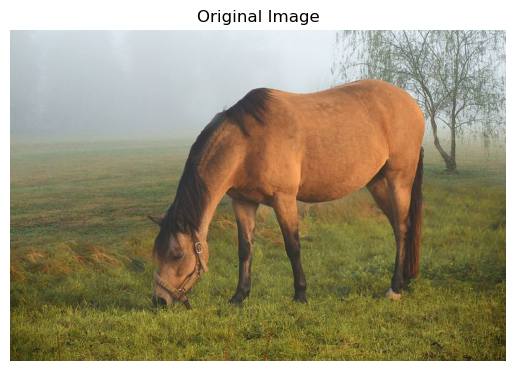

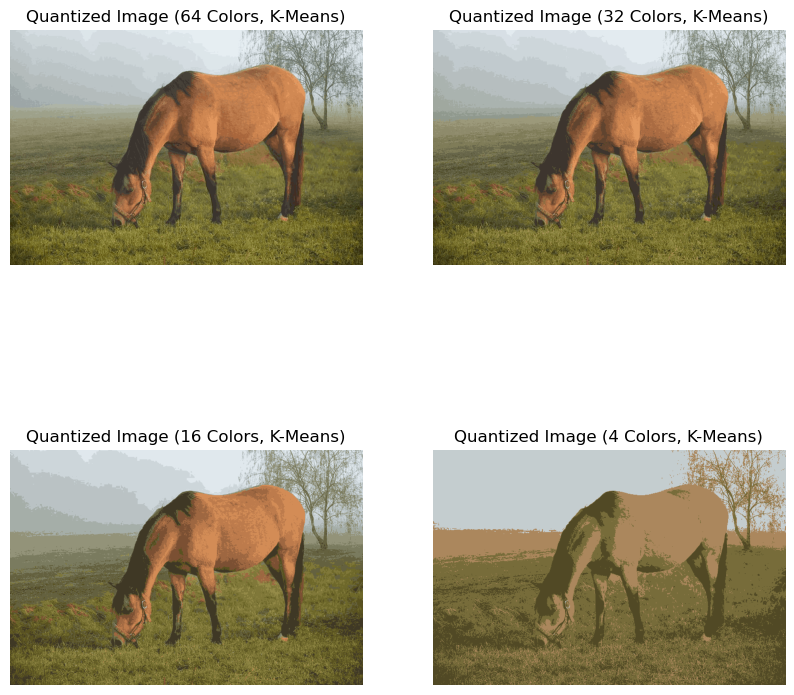

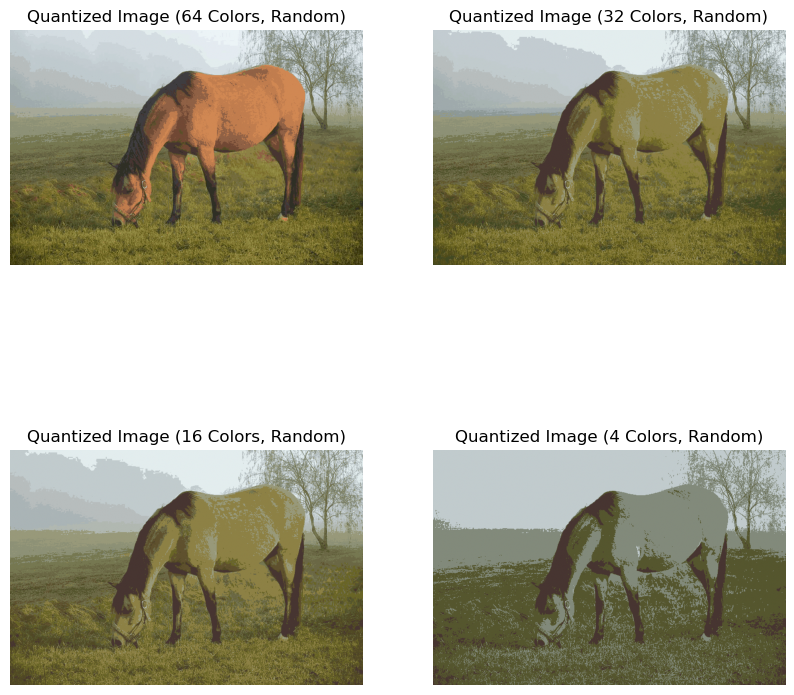

In [3]:
# Hàm để tái tạo hình ảnh từ các trung tâm cụm và nhãn
def recreate_image(codebook, labels, width, height):
    """
    Tái tạo hình ảnh từ bảng mã màu (codebook) và nhãn cụm.
    """
    depth = codebook.shape[1]  # Số kênh màu (RGB)
    image = np.zeros((width, height, depth))  # Tạo mảng 0 cho hình ảnh
    label_idx = 0
    for i in range(width):
        for j in range(height):
            image[i][j] = codebook[labels[label_idx]]  # Gán màu từ bảng mã
            label_idx += 1
    return image

# Đọc và chuẩn hóa hình ảnh
pepper = imread("D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\horses.jpg")  # Đổi đường dẫn hình ảnh của bạn
pepper = np.array(pepper, dtype=np.float64) / 255  # Chuẩn hóa giá trị từ 0-255 về 0-1
w, h, d = pepper.shape  # Lấy kích thước gốc của hình ảnh
assert d == 3  # Đảm bảo ảnh có 3 kênh (RGB)
image_array = np.reshape(pepper, (w * h, d))  # Chuyển ảnh thành mảng 2D

# Hiển thị hình ảnh gốc
plt.figure(1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(pepper)

# Lượng tử hóa màu bằng K-Means
plt.figure(2, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Mẫu hóa ảnh cho quá trình K-Means
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    
    # Áp dụng thuật toán K-Means
    print(f"Running K-Means with k={k}...")
    t0 = time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print(f"K-Means done in {time() - t0:.3f}s.")

    # Dự đoán nhãn cụm cho tất cả pixel
    print("Predicting labels for the full image...")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"Prediction done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, K-Means)')
    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    plt.imshow(quantized_image)

# Lượng tử hóa màu bằng cách chọn ngẫu nhiên bảng mã
plt.figure(3, figsize=(10, 10))
for i, k in enumerate([64, 32, 16, 4], 1):
    # Tạo bảng mã màu ngẫu nhiên
    codebook_random = shuffle(image_array, random_state=0)[:k]
    
    # Dự đoán nhãn cụm dựa trên bảng mã ngẫu nhiên
    print(f"Running Random Quantization with k={k}...")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"Random Quantization done in {time() - t0:.3f}s.")

    # Tái tạo hình ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Quantized Image ({k} Colors, Random)')
    random_image = recreate_image(codebook_random, labels_random, w, h)
    plt.imshow(random_image)

plt.show()


Training data shape: (60000, 784)
Training labels shape: (60000,)
Testing data shape: (10000, 784)
Testing labels shape: (10000,)


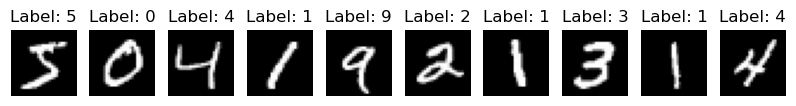

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST từ TensorFlow
def load_mnist_data():
    # Tải tập dữ liệu (tự động tải về nếu chưa có)
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

    # Chuẩn hóa dữ liệu: đưa các giá trị pixel về khoảng [0, 1]
    train_images = train_images.reshape(-1, 784).astype('float32') / 255.0
    test_images = test_images.reshape(-1, 784).astype('float32') / 255.0

    return train_images, train_labels, test_images, test_labels

# Hàm hiển thị một số hình ảnh từ tập dữ liệu
def display_samples(images, labels, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Tải và xử lý dữ liệu MNIST
train_data, train_labels, test_data, test_labels = load_mnist_data()

# Hiển thị thông tin dataset
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_data.shape}")
print(f"Testing labels shape: {test_labels.shape}")

# Hiển thị một số mẫu từ tập dữ liệu huấn luyện
display_samples(train_data, train_labels, num_samples=10)


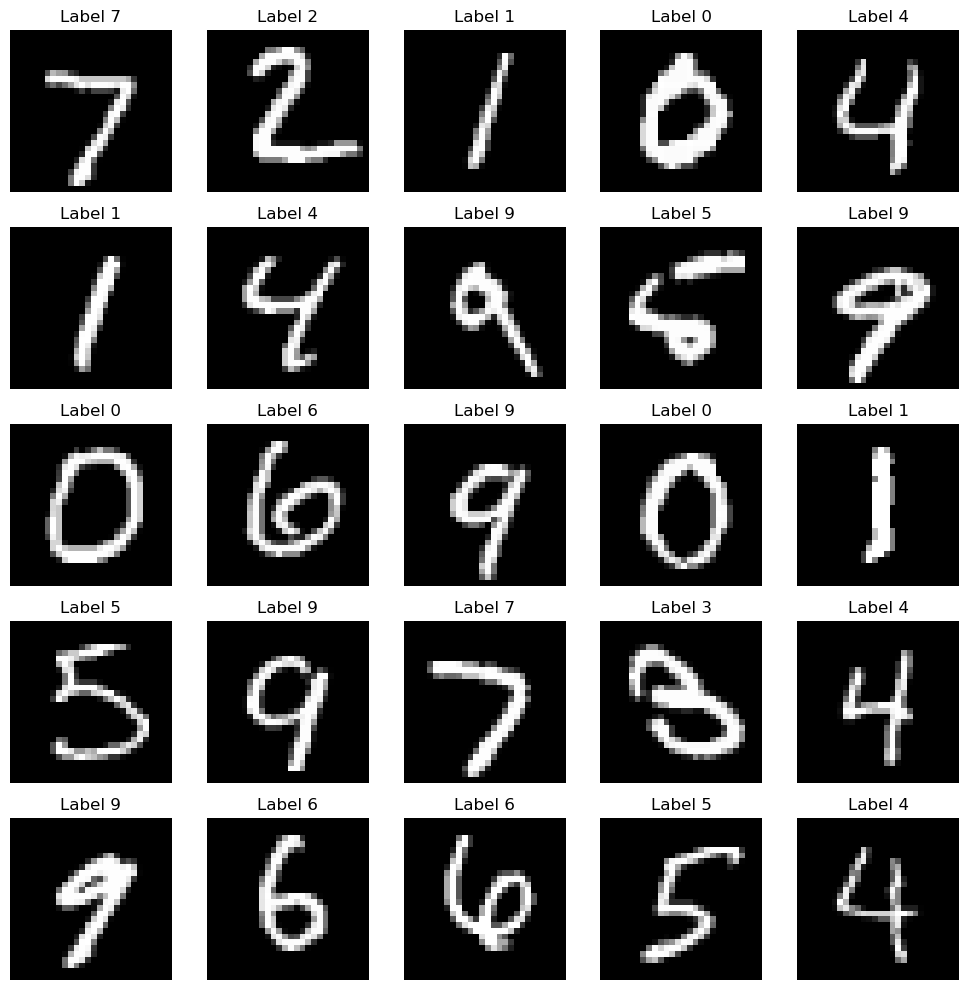

In [7]:
# Define a function to display a digit given its vector representation
def show_digit(x, label):
    plt.axis('off')  # Turn off axis
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)  # Reshape and display the digit
    plt.title(f'Label {label}')  # Set the title to display the label

# Create a figure to display multiple digits
plt.figure(figsize=(10, 10))

# Loop through the first 25 digits and display them in a 5x5 grid
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a subplot in the grid
    show_digit(test_data[i,], test_labels[i])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the grid of digits


In [ ]:
# Computing the nearest neighbors
import time
from sklearn.neighbors import BallTree
import numpy as np

# Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

# Compute training time
t_training = t_after - t_before
print("Time to build data structure (seconds):", t_training)

# Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(
    ball_tree.query(test_data, k=1, return_distance=False)
)
test_predictions = train_labels[test_neighbors]
t_after = time.time()

# Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds):", t_testing)



Time to build data structure (seconds): 6.731706619262695
Time to classify test set (seconds): 714.9378077983856


Accuracy: 0.9691


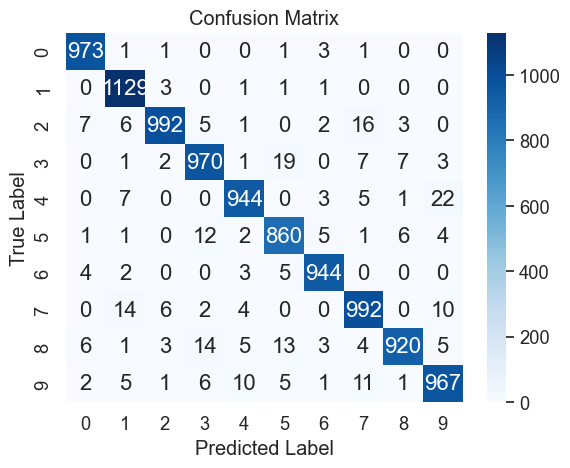

In [9]:
# Evaluate the classifier
t_accuracy = sum(test_predictions == test_labels) / float(len(test_labels))
print(f"Accuracy: {t_accuracy:.4f}")  # In ra độ chính xác (với 4 chữ số thập phân)

# Example accuracy output: 0.9691

# Import libraries for confusion matrix visualization
import pandas as pd
import seaborn as sn
from sklearn import metrics

# Compute the confusion matrix
cm = metrics.confusion_matrix(test_labels, test_predictions)

# Create a DataFrame for better visualization
df_cm = pd.DataFrame(cm, range(10), range(10))

# Plot the confusion matrix
sn.set(font_scale=1.2)  # Set font scale for labels
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="g", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


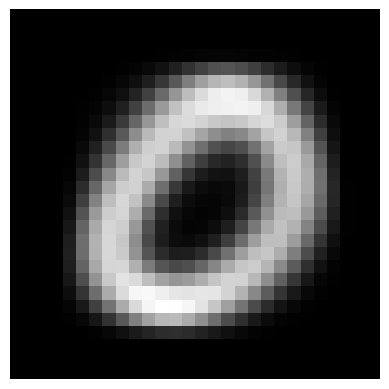

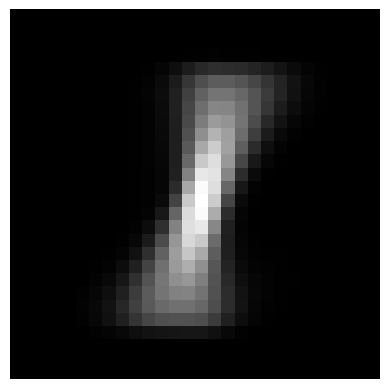

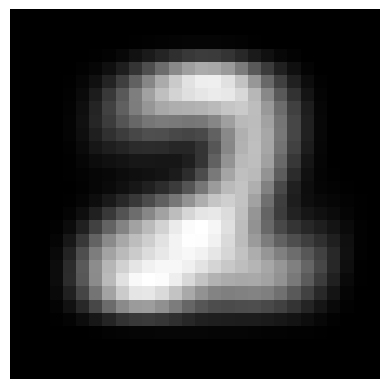

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display a single character image
def display_char(image):
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

# Function to fit a generative model
def fit_generative_model(x, y):
    k = 10  # Number of labels: 0, 1, ..., k-1
    d = x.shape[1]  # Number of features (dimensionality of each data point)
    
    # Initialize mean (mu), covariance (sigma), and prior probabilities (pi)
    mu = np.zeros((k, d))
    sigma = np.zeros((k, d, d))
    pi = np.zeros(k)
    
    c = 3500  # Regularization constant to avoid singularity in covariance matrix

    # Compute the parameters for each label
    for label in range(k):
        indices = (y == label)  # Get indices of samples belonging to the current label
        pi[label] = sum(indices) / float(len(y))  # Prior probability for the label
        mu[label] = np.mean(x[indices, :], axis=0)  # Mean vector for the label
        sigma[label] = np.cov(x[indices, :], rowvar=False, bias=True) + c * np.eye(d)  # Regularized covariance matrix
    
    return mu, sigma, pi

# Fit the generative model to training data
mu, sigma, pi = fit_generative_model(train_data, train_labels)

# Display the mean image for each label
display_char(mu[0])  # Display the mean image for label 0
display_char(mu[1])  # Display the mean image for label 1
display_char(mu[2])  # Display the mean image for label 2


In [12]:
# Compute log Pr(label|image) for each [test image, label] pair.
k = 10  # Number of classes (0, 1, ..., 9)
score = np.zeros((len(test_labels), k))  # Array to store log probabilities for each class

# Loop over each label (class)
for label in range(k):
    # Create a multivariate normal distribution for each label using its mean and covariance
    rv = multivariate_normal(mean=mu[label], cov=sigma[label])
    
    # Loop over each test image
    for i in range(len(test_labels)):
        # Compute the log of the posterior probability for the current test image and label
        score[i, label] = np.log(pi[label]) + rv.logpdf(test_data[i, :])

# Get the class predictions by selecting the label with the highest log probability
test_predictions = np.argmax(score, axis=1)

# Finally, tally up the errors
errors = np.sum(test_predictions != test_labels)
print(f"The generative model makes {errors} errors out of 10000")

# Calculate accuracy
t_accuracy = sum(test_predictions == test_labels) / float(len(test_labels))
print(f"Accuracy: {t_accuracy}")


The generative model makes 8865 errors out of 10000
Accuracy: 0.1135


In [ ]:
from sklearn.svm import SVC
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Khởi tạo mô hình SVM với kernel polynomial và degree = 2
clf = SVC(C=1, kernel='poly', degree=2)

# Huấn luyện mô hình với dữ liệu huấn luyện
clf.fit(train_data, train_labels)

# In ra độ chính xác của mô hình trên tập kiểm tra
print(clf.score(test_data, test_labels))  # Output ví dụ: 0.9806

# Dự đoán nhãn của tập kiểm tra
test_predictions = clf.predict(test_data)

# Tính ma trận nhầm lẫn (confusion matrix)
cm = metrics.confusion_matrix(test_labels, test_predictions)

# Chuyển ma trận nhầm lẫn thành DataFrame để dễ dàng thao tác và hiển thị
df_cm = pd.DataFrame(cm, range(10), range(10))

# Cài đặt phông chữ cho kích thước nhãn
sn.set(font_scale=1.2)

# Hiển thị ma trận nhầm lẫn dưới dạng biểu đồ heatmap
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="g")

# Hiển thị biểu đồ
plt.show()


In [ ]:
wrong_indices = test_predictions != test_labels
wrong_digits, wrong_preds, correct_labs = test_data[wrong_indices], test_predictions[wrong_indices], test_labels[wrong_indices]

# Print the number of wrong predictions
print(len(wrong_preds))  # Output: 194

# Display the first incorrect prediction
pylab.title('Predicted: ' + str(wrong_preds[1]) + ', Actual: ' + str(correct_labs[1]))
display_char(wrong_digits[1])
